<a href="https://colab.research.google.com/github/makena-yvonne/principleofdatascienceexam/blob/main/covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

Read the data

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/makena-yvonne/principleofdatascienceexam/main/WHO%20COVID-19%20global%20table%20data%20April%2011th%202021%20at%206.54.53%20PM.csv")
df.head()


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,Global,134957021,1728.819501,4450234,57.008159,646863,2918752,37.389647,75597,0.968409,10712,NaN
1,United States of America,Americas,30692226,9272.500000,387764,117.150000,0,554783,167.610000,4244,1.280000,0,Community transmission
2,Brazil,Americas,13373174,6291.500000,463092,217.860000,93317,348718,164.060000,20512,9.650000,3693,Community transmission
3,India,South-East Asia,13358805,968.030000,873296,63.280000,152879,169275,12.270000,4652,0.340000,839,Clusters of cases
4,France,Europe,4945238,7603.450000,265444,408.130000,43283,97956,150.610000,2087,3.210000,207,Community transmission


View some basic statistical details like percentile, mean, std etc

In [15]:
df.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,2.370000e+02,236.000000,2.370000e+02,236.000000,237.000000,2.370000e+02,236.000000,237.000000,236.000000,237.000000
mean,1.138878e+06,2788.373218,3.755472e+04,91.068679,5458.759494,2.463082e+04,45.710380,637.949367,1.508214,90.396624
std,9.061349e+06,3331.038834,2.977657e+05,143.392578,43735.416311,1.949583e+05,61.887691,5107.521905,2.985648,738.933774
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-2.000000,-0.670000,0.000000
25%,3.154000e+03,146.200000,2.700000e+01,1.817500,0.000000,3.000000e+01,1.635000,0.000000,0.000000,0.000000
50%,2.939600e+04,1369.485000,7.520000e+02,19.840000,32.000000,4.530000e+02,15.490000,8.000000,0.190000,0.000000
75%,2.457040e+05,4925.912500,6.702000e+03,140.065000,865.000000,4.182000e+03,75.302500,79.000000,1.635000,10.000000
max,1.349570e+08,16174.210000,4.450234e+06,1095.720000,646863.000000,2.918752e+06,279.010000,75597.000000,17.420000,10712.000000


Show the number of rows and columns in the data

In [45]:
df.shape

(237, 13)

Show specific columns

In [44]:
df[['Name','WHO Region','Cases - cumulative total']]

,Name,WHO Region,Cases - cumulative total
0,Global,Global,134957021
1,United States of America,Americas,30692226
2,Brazil,Americas,13373174
3,India,South-East Asia,13358805
4,France,Europe,4945238
...,...,...,...
232,Pitcairn Islands,Western Pacific,0
233,Tokelau,Western Pacific,0
234,Tonga,Western Pacific,0
235,Turkmenistan,Europe,0


Show the relationship between different columns. 

In [47]:
df[['Cases - newly reported in last 7 days','Cases - newly reported in last 7 days per 100000 population']].corr()

,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population
Cases - newly reported in last 7 days,1.000000,0.028926
Cases - newly reported in last 7 days per 100000 population,0.028926,1.000000


Show data in a bar graph

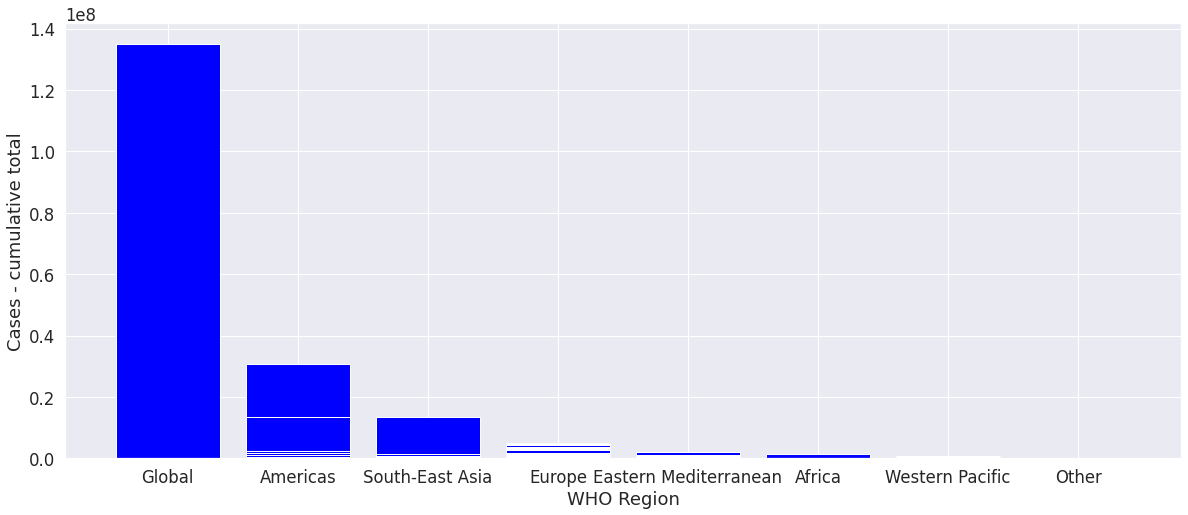

In [35]:
plt.figure(figsize=(20,8))
x=df['WHO Region']
y=df['Cases - cumulative total']
plt.bar(x,y,color='blue')
plt.xlabel('WHO Region')
plt.ylabel('Cases - cumulative total')
plt.show()

Train data using Linear regression to predict new cases

Text(0, 0.5, 'Deaths - newly reported in last 7 days')

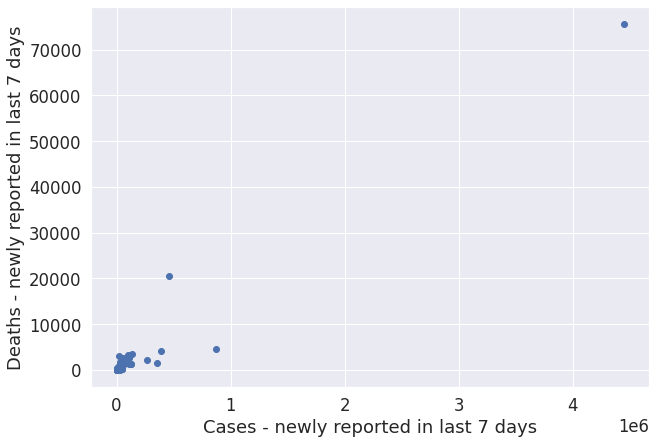

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(df['Cases - newly reported in last 7 days'],df['Deaths - newly reported in last 7 days'])
plt.xlabel('Cases - newly reported in last 7 days')
plt.ylabel('Deaths - newly reported in last 7 days')

In [49]:
x=df['Cases - newly reported in last 7 days']
y=df['Deaths - newly reported in last 7 days']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y)
len(X_test)

60

**Corelation heatmap**

Show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

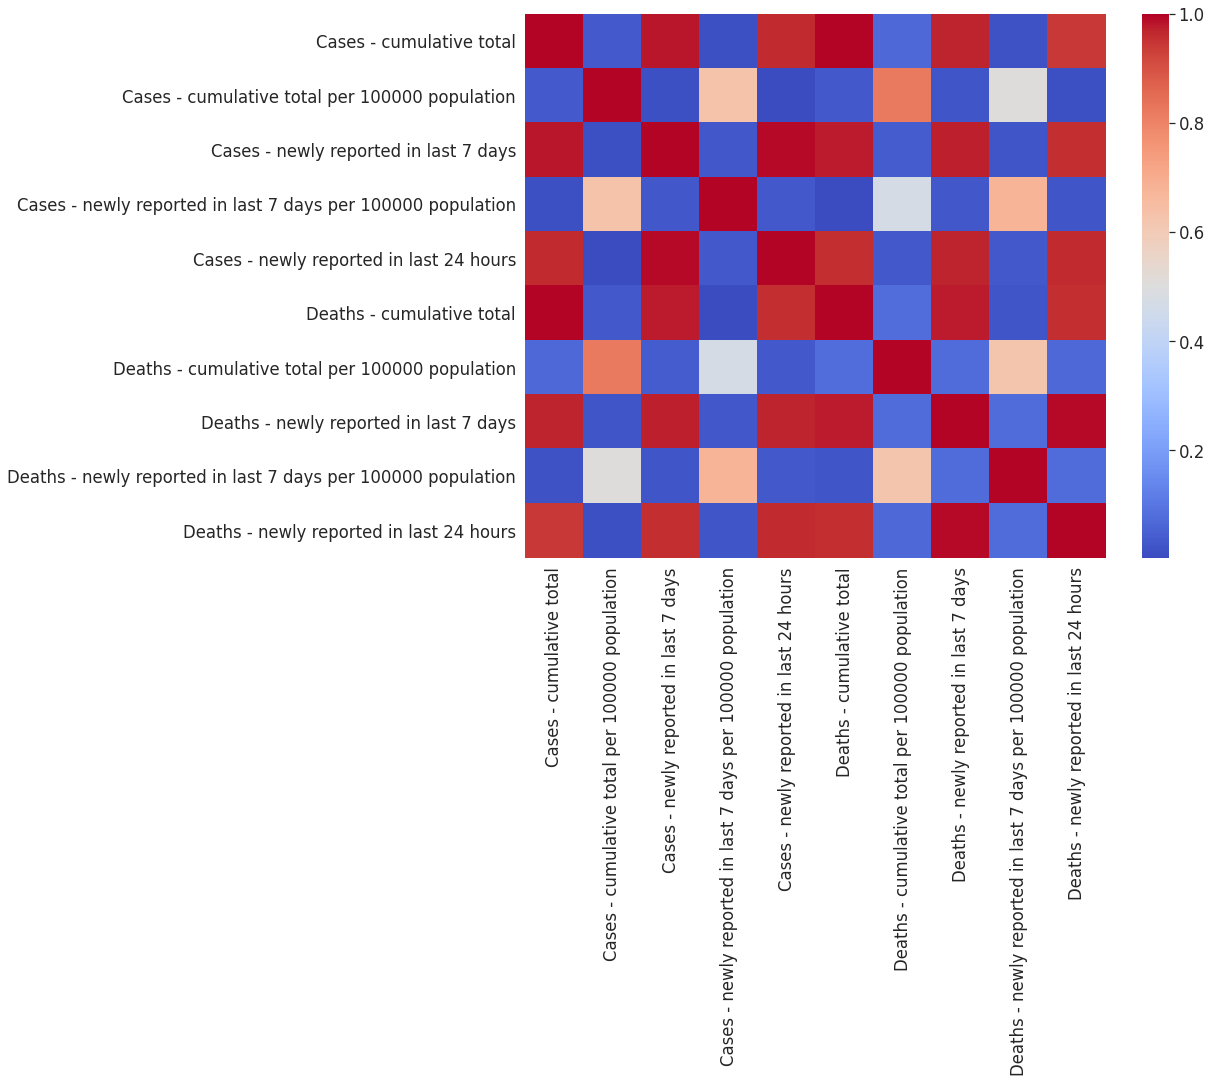

In [38]:
corr = df.corr()
_,ax = plt.subplots(figsize = (13,10))
_ = sns.heatmap(corr,ax = ax,xticklabels = corr.columns.values,
                yticklabels = corr.columns.values,
                cmap = "coolwarm")